# Lista 1

## Uczenie maszynowe i sztuczna inteligencja

* [regresja](https://pl.wikipedia.org/wiki/Regresja_(statystyka))
* [podobieństwo konsinusowe](https://en.wikipedia.org/wiki/Cosine_similarity)

In [1]:
# Preparation
import os
import zipfile
import numpy as np
import pandas as pd
import requests
from matplotlib import pyplot as plt

download_path_url = "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
data_zip_path = download_path_url.split("/")[-1]
data_path = data_zip_path.split(".")[0]
ratings_path = os.path.join(data_path, 'ratings.csv')

if not os.path.isdir(data_path) and not os.path.isfile(data_zip_path):
    print("Downloading zip")
    r = requests.get(download_path_url, allow_redirects=True)
    with open(data_zip_path, 'wb') as file:
        file.write(r.content)

if not os.path.isdir(data_path) and os.path.isfile(data_zip_path):
    print("Unzipping data")
    with zipfile.ZipFile(data_zip_path, 'r') as zip_ref:
        zip_ref.extractall()

In [2]:
class RatingsModel:
    def __init__(self, row):
        self.userId = int(row[1].get('userId'))
        self.movieId = int(row[1].get('movieId'))
        self.rating = int(row[1].get('rating'))

def headRows(nparray, n=8):
    for i in range(n):
        print(nparray[i])

In [3]:
data = pd.read_csv(ratings_path)
data.sample(5, random_state=42)

,userId,movieId,rating,timestamp
67037,432,77866,4.5,1335139641
42175,288,474,3.0,978465565
93850,599,4351,3.0,1498524542
6187,42,2987,4.0,996262677
12229,75,1610,4.0,1158989841


## Zadanie 1 (10pt)

Napisz wykorzystując regresję liniową program, który na podstawie oceny filmów przez użytkowników będzie
starał się przewidzieć ocenę innych użytkowników. Jako dane wykorzystamy zbiór
[MovieLens Latest Datasets](https://grouplens.org/datasets/movielens/latest/).
Dokładnie wybierzemy mniejszy zbiór, pobierz plik
[ml-latest-small.zip](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip").
Zadanie polega na wybraniu z pliku <em>ratings.csv</em> tych użytkowników ($\mbox{userId}$), którzy ocenili film
'Toy Story (1995)', który w tym pliku ma identyfikator '1' (patrz <em>movies.csv</em>).
W tym pliku osób takich jest $215$. Wtedy zgodnie z zapisem z wykładu
$x_{ij}$ będzie oceną $i$-tego użytkownika dla $i=0,\ldots, 214$, bo
taki jest nasz zbiór osób, które oceniły 'Toy Story' oraz $j$ będzie oceną $j$-tego filmu
dla $j=0,\ldots,m$. Jako $j$ można wybrać $\mbox{movieId}$ filmu, czyli
np. film o $\mbox{movieId}=42$ oceniony przez użytkownika $5$ (nie jest to $\mbox{userId}$, tylko
piąta osoba ze zbioru $215$ osób), który ocenił film jako np. $3.5$ wpisujemy $x[5, 42] = 3.5$.
Natomiast $y_i$ to ocena 'Toy Story' przez $i$-tego użytkownika. Zatem tworzymy macierz $X = [x_{ij}]$ oraz wektor $y_i$
gdzie $i=0,\ldots,215$ oraz $j=0,\ldots,m$. Dla tak przygotowanych danych wykonujemy:

* regresje liniową na całym zbiorze użytkowników dla $m=10,1000,10000$,
  czyli np. dla $m=10$ ignorujemy filmy o $\mbox{movieId} \gt 10$ i robimy regresje
  dla tak okrojonego zbioru ocen. Jakie dostajemy błędy. Pokaż na wykresie.
* podziel zbiór osób na tzw. zbiór treningowy oraz zbiór testowy np.
  weźmy $i=0,\ldots,200$ to będzie zbiór treningowy i na takim zbiorze osób wykonajmy regresje
  natomiast później sprawdzamy już dla całości ($215$). Zatem ostatnie
  $15$ ocen będziemy chcieli przewidzieć (zbiór testowy). Zrób przewidywanie dla
  $m=10,100,200,500,1000,10000$. Wyświetl wynik predykcji i wynik prawidłowy
  dla tych $15$ osób.

Przykład danych do regresji jakie otrzymujemy dla $m=10$ i $n=215$.

```
X = [[0.  4.  0.  0.  4.  0.  0.  0.  0.  0. ]
     [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
     [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
     [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
     [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
     [3.  0.  0.  0.  4.  0.  0.  0.  0.  0. ]
     [3.  3.  0.  0.  0.  2.  0.  0.  2.  0. ]
     [3.5 0.  0.  0.  0.  0.  0.  0.  5.  0. ]
     ...
y = [[4. ]
     [4. ]
     [4.5]
     [2.5]
     [4.5]
     [3.5]
     [4. ]
     [3.5]
     ...
```


In [4]:
# wybranie uzytkownikow, którzy ocenili film Toy Story
users = []
for row in data.iterrows():
    model = RatingsModel(row)
    if model.movieId == 1:
        users.append(model.userId)
users = list(sorted(list(set(users))))
print(users[:10])
print(len(users))

[1, 5, 7, 15, 17, 18, 19, 21, 27, 31]
215


In [18]:
def create_matrix_Xij_and_y(m=10):
    Xij = np.zeros((len(users),m-1))
    y = np.zeros(len(users))
    for row in data.iterrows():
        model = RatingsModel(row)
            
        if model.movieId > m:
            continue
        if model.userId in users:
            userIndex = users.index(model.userId)
            if model.movieId == 1:
                y[userIndex] = model.rating
            else:
                Xij[userIndex, model.movieId-2] = model.rating
    return Xij, y

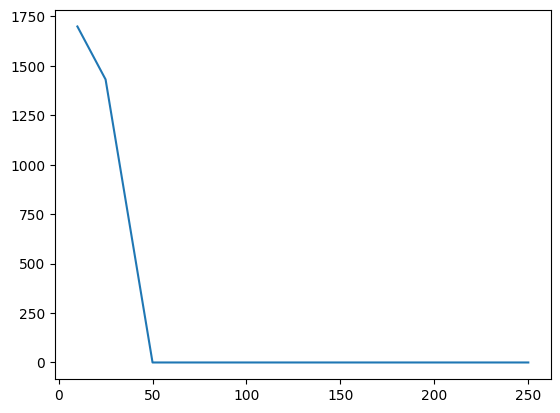

In [35]:
def task1():
    plot_xs = [10, 25, 50, 100, 250]
    plot_ys = []
    for m in plot_xs:
        Xij, y = create_matrix_Xij_and_y(m=m)
        solution = np.linalg.lstsq(Xij, y, rcond=None)
        error = solution[1][0] if solution[1] else 0

        plot_ys.append(error)
    plt.plot(plot_xs, plot_ys)
    plt.show()
task1()     

m=10
0.0  ,4.75 ,0.0  ,3.11 ,5.61 ,3.83 ,0.0  ,1.47 ,4.29 ,1.56 ,0.9  ,0.0  ,3.55 ,2.07 ,1.84 ,
5.0  ,4.0  ,4.0  ,4.0  ,3.0  ,2.0  ,4.0  ,4.0  ,3.0  ,4.0  ,2.0  ,4.0  ,2.0  ,3.0  ,5.0  ,
error=10.631846644589864
m=25
1.68 ,5.22 ,0.0  ,4.86 ,7.64 ,4.93 ,0.0  ,4.14 ,2.72 ,1.24 ,1.86 ,1.06 ,5.03 ,1.76 ,1.1  ,
5.0  ,4.0  ,4.0  ,4.0  ,3.0  ,2.0  ,4.0  ,4.0  ,3.0  ,4.0  ,2.0  ,4.0  ,2.0  ,3.0  ,5.0  ,
error=10.849677980958678
m=50
3.76 ,5.06 ,3.95 ,5.94 ,2.02 ,6.43 ,2.56 ,2.19 ,4.14 ,-0.37,4.66 ,1.66 ,4.88 ,1.08 ,2.59 ,
5.0  ,4.0  ,4.0  ,4.0  ,3.0  ,2.0  ,4.0  ,4.0  ,3.0  ,4.0  ,2.0  ,4.0  ,2.0  ,3.0  ,5.0  ,
error=9.114167364162656
m=100
4.57 ,5.26 ,4.36 ,5.06 ,-3.88,2.85 ,3.26 ,-0.86,6.34 ,-0.35,7.59 ,2.32 ,4.2  ,0.92 ,3.19 ,
5.0  ,4.0  ,4.0  ,4.0  ,3.0  ,2.0  ,4.0  ,4.0  ,3.0  ,4.0  ,2.0  ,4.0  ,2.0  ,3.0  ,5.0  ,
error=12.325889167592614
m=250
18.71,14.66,5.22 ,21.75,-140.3,22.77,1.68 ,145.24,-65.04,11.63,-137.85,-11.38,-83.87,3.24 ,-39.49,
5.0  ,4.0  ,4.0  ,4.0  ,3.0  ,2.0  ,4.0  ,4.0  

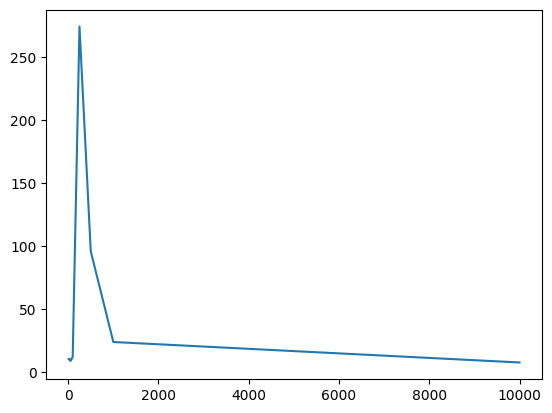

In [53]:
def task2():
    possible_ms = [10,25,50,100,250,500,1000,10000]
    errors = []
    for m in possible_ms:
        Xij, y = create_matrix_Xij_and_y(m=m)
        training_Xij = Xij[:200]
        training_y = y[:200]
        solution = np.linalg.lstsq(training_Xij, training_y, rcond=None)

        test_Xij = Xij[200:]
        test_y = y[200:]

        evaled = test_Xij.dot(solution[0])
        print(f"{m=}")
        for item in evaled:
            print(str(round(item, 2)).ljust(5), end=",")
        print()
        for item in test_y:
            print(str(round(item, 2)).ljust(5), end=",")
        print()

        error = (np.linalg.norm((test_y - evaled)))
        errors.append(error)
        print(f"{error=}")
    plt.plot(possible_ms, errors)
    plt.show()

        
        
task2()

## Zadanie 2 (15pt)

Napisz system rekomendacji filmów. Systemy takie są wykorzystywane przez różne firmy np.
Netflix organizował konkurs na opracowanie algorytmu, który będzie przewidywał
ocenę użytkownika [Netflix Prize](https://en.wikipedia.org/wiki/Netflix_Prize).
W zadaniu tym zaimplementujemy podobny system, który jednak zamiast przewidywania będzie na
podstawie preferencji użytkownika rekomendował filmy, które najprawdopodobniej mu się spodobają.
Istnieje wiele sposobów, aby taki system napisać, dla zainteresowanych bardziej tematem proponuje
zobaczyć np. [Recommendation Systems](http://infolab.stanford.edu/~ullman/mmds/ch9.pdf).
W tym zadaniu wybierzemy w miarę prosty i łatwy do implementacji system rekomendacji.
Sformalizujmy problem. Załóżmy, że mamy macierz oceny, gdzie wiersze będą reprezentować
użytkowników a kolumny filmy np.
$$ \begin{array}{ccc}
    & \mbox{Matrix} & \mbox{Star Wars IV} \\
    \mbox{Alice} & 5 & 4 \\
    \mbox{Bob} & 0 & 1 \\
    \mbox{John} & 2 & 2 \\
    \mbox{Ada} & 5 & 5
   \end{array}$$
Patrząc na powyższą macierz widać, że kolumny pierwsza i druga mają podobne oceny stąd można wywnioskować, że
filmy Matrix i Star Wars IV są (według użytkowników) podobne do siebie, czyli jeśli komuś podobał się Matrix
to jest duża szansa, że będzie podobał mu się Star Wars i odwrotnie. Dlatego "podobieństwo" sformalizujemy przez wykorzystanie
[podobieństwa cosinusowego](https://en.wikipedia.org/wiki/Cosine_similarity), czyli
jeśli $x = (x_1, x_2, \dots, x_n)$ i $y = (y_1, y_2, \dots, y_n)$, wtedy:
$$x_1 y_1 + x_2 y_2 + \cdots + x_n y_n = x \cdot y = \lVert x \rVert \lVert y \rVert \cos(\theta)$$
Gdzie $\theta$ jest kątem między wektorami. Wygodniej będzie nam normalizować wektory. Wtedy
$$x_1 y_1 + x_2 y_2 + \cdots + x_n y_n = \cos(\theta).$$ Wtedy $\cos(\theta)$ reprezentuje
podobieństwo jednego wektora do drugiego, czyli jak bardzo jedne oceny są bliskie innym.

Dla naszej macierzy otrzymujemy


### Zadanie do wykoniania

Napisz system rekomendacji filmów który będzie wykorzystywał dane
[MovieLens Latest Datasets](https://grouplens.org/datasets/movielens/latest/).
Dokładnie mniejszy zbiór (który dodatkowo trochę jeszcze zmniejszymy). Pobierz plik
[ml-latest-small.zip](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip).
Interesować, będą nas głównie dwa pliki movies.csv oraz ratings.csv. W pliku ratings.csv mamy
właściwie wszystkie dane, które będą nam potrzebne aby stworzyć macierz oceny. Ponieważ
nawet w tym przypadku otrzymana macierz będzie dość duża dlatego w trakcie wczytywania
danych z pliku proszę wziąć pod uwagę tylko te wiersze (z pliku ratings.csv) w których <b>movie_id</b> (druga kolumna)
jest mniejsze od 10000 (resztę ignorujemy). Dla aktualnych danych ze strony otrzymamy, wtedy macierz mniej więcej 611x9019.
Przykładowy wynik dla wybranego profilu filmowego:

```
# wektor my_ratings odpowiada wektorowi y z przykładu wyżej
my_ratings = np.zeros((9019,1))
my_ratings[2571] = 5      # patrz movies.csv  2571 - Matrix
my_ratings[32] = 4        # 32 - Twelve Monkeys
my_ratings[260] = 5       # 260 - Star Wars IV
my_ratings[1097] = 4
my_ratings_norm = my_ratings/np.linalg.norm(my_ratings)

...

# otrzymujemy wynik rekomendacji po posortowaniu
# (cos(θ), movies_id)
(0.8675507828468105, 260)
(0.8362098349303669, 2571)
(0.8227451213877744, 1196)
(0.8002349214247857, 1210)
(0.7458504689612442, 1097)
(0.7286029159733108, 32)
(0.7265369898748615, 1198)
(0.7095672455110477, 1240)
(0.7029872178855614, 1270)
```

Otrzymane reprezentacje wyświetl w postaci nazw filmów, korzystając z movies.csv. Uwaga: w rzeczywistych
danych otrzymamy dużą liczbę zer, nawet całe kolumny, wtedy dostaniemy wartości NaN przy dzieleniu!
Rozwiąż ten problem wykorzystując np.nan_to_num(...).



In [ ]:
def normalize(data, axis=-1):
    normalized = np.linalg.norm(data, axis=axis)
    for i in range(len(normalized)):
        if normalized[i] == 0:
            normalized[i] = np.inf
    return data / normalized

In [ ]:
maxUserId = max(data.get('userId'))
maxMovieId = max((movieId for movieId in data.get('movieId') if movieId < 10000))

In [ ]:
x = np.zeros((maxUserId+1, maxMovieId+1))
for row in data.iterrows():
    model = RatingsModel(row)
    if model.movieId >= 10000: 
        continue
    #print(f"{userId=}, {movieId=}, {rating=}")
    x[model.userId][model.movieId] = model.rating
    #print(f"{userId=}, {movieId=}, {y[userId][movieId]=}")

In [ ]:
normalized_x = normalize(x, axis=0)
print(normalized_x)


In [ ]:
my_ratings = np.zeros((9019,1))
my_ratings[2571] = 5      # patrz movies.csv  2571 - Matrix
my_ratings[32] = 4        # 32 - Twelve Monkeys
my_ratings[260] = 5       # 260 - Star Wars IV
my_ratings[1097] = 4
my_ratings_norm = my_ratings/np.linalg.norm(my_ratings)

In [ ]:
z = np.dot(normalized_x, my_ratings_norm)
X = normalize(x, axis=0)
Z = normalize(z, axis=0)


In [ ]:
recomendations = np.dot(X.T, Z)
print("cos     , movieId")
for recomendation in sorted(
    list(enumerate([x[0] for x in recomendations.tolist()])), 
    key=lambda x: x[1], 
    reverse=True
)[:10]:
    print(f"{round(recomendation[1],6)}, {recomendation[0]}")